In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

#### Анализ файла googleplaystore.csv с Kaggle

In [234]:
%time data = pd.read_csv('googleplaystore.csv', dtype='unicode')
data.info()

CPU times: user 56 ms, sys: 4 ms, total: 60 ms
Wall time: 131 ms
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null object
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: object(13)
memory usage: 550.6+ KB


In [235]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

###### Выполняем очиcтку данных
Данные взял с Google Play

In [236]:
eggs= []
idx = data.loc[data['Installs'] ==  'Free', :].index[0]
for i in data.iloc[idx, :]:
    eggs.append(i)
eggs.insert(1, 'LIFESTYLE')
eggs.pop()
eggs[9] = 'Lifestyle'
data.iloc[idx, :] = eggs

In [237]:
idx = data.loc[data['Type'].isnull(), :].index[0]
eggs = ['Command & Conquer: Rivals', 'FAMILY', '4.0', '111515', '75M', '1,000,000+', 'Free', '0', 'Everyone 10+', 'Strategy', 'April 23, 2019', '1.5.0', '4.1 and up']
data.iloc[idx, :] = eggs

Заменил NaN на наиболее частые значения в данных.

In [238]:
data['Android Ver'].replace(np.nan, '4.1 and up', inplace=True)
data['Current Ver'].replace(np.nan, 'Varies with device', inplace=True)

Преобразуем в числовой тип.

In [239]:
data['Rating'] = data['Rating'].astype(float)
data['Reviews'] = data['Reviews'].astype(int)

Заполняем значения NaN средним рейтингом по каждой из категорий.

In [245]:
for ctg in data['Category'].unique():
    ctg_mean = round(data.loc[data['Category'] == ctg, 'Rating'].mean(), 1)
    data.loc[data['Rating'].isnull() & (data['Category'] == ctg), 'Rating'] = ctg_mean

ART_AND_DESIGN 4.4
AUTO_AND_VEHICLES 4.2
BEAUTY 4.3
BOOKS_AND_REFERENCE 4.3
BUSINESS 4.1
COMICS 4.2
COMMUNICATION 4.2
DATING 4.0
EDUCATION 4.4
ENTERTAINMENT 4.1
EVENTS 4.4
FINANCE 4.1
FOOD_AND_DRINK 4.2
HEALTH_AND_FITNESS 4.3
HOUSE_AND_HOME 4.2
LIBRARIES_AND_DEMO 4.2
LIFESTYLE 4.1
GAME 4.3
FAMILY 4.2
MEDICAL 4.2
SOCIAL 4.3
SHOPPING 4.3
PHOTOGRAPHY 4.2
SPORTS 4.2
TRAVEL_AND_LOCAL 4.1
TOOLS 4.0
PERSONALIZATION 4.3
PRODUCTIVITY 4.2
PARENTING 4.3
WEATHER 4.2
VIDEO_PLAYERS 4.1
NEWS_AND_MAGAZINES 4.1
MAPS_AND_NAVIGATION 4.1


Примечание:
Комманды указанные ниже почему-то данные не поменяли:  
data.loc[data['Category'] == 'BEAUTY', 'Rating'].replace(np.nan, ctg_mean, nplace=True)  
data.loc[data['Category'] == 'BEAUTY', 'Rating'].fillna(value = ctg_mean, inplace=True)  

Просьба объяснить почему.

In [241]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null int32
Size              10841 non-null object
Installs          10841 non-null object
Type              10841 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10841 non-null object
Android Ver       10841 non-null object
dtypes: float64(1), int32(1), object(11)
memory usage: 592.9+ KB


Количество инсталляций переводим в тип int.

In [243]:
data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'] = data['Installs'].str.replace(',', '')
data['Installs'] = data['Installs'].astype(int)

In [246]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###### Попытка визуализировать данные.

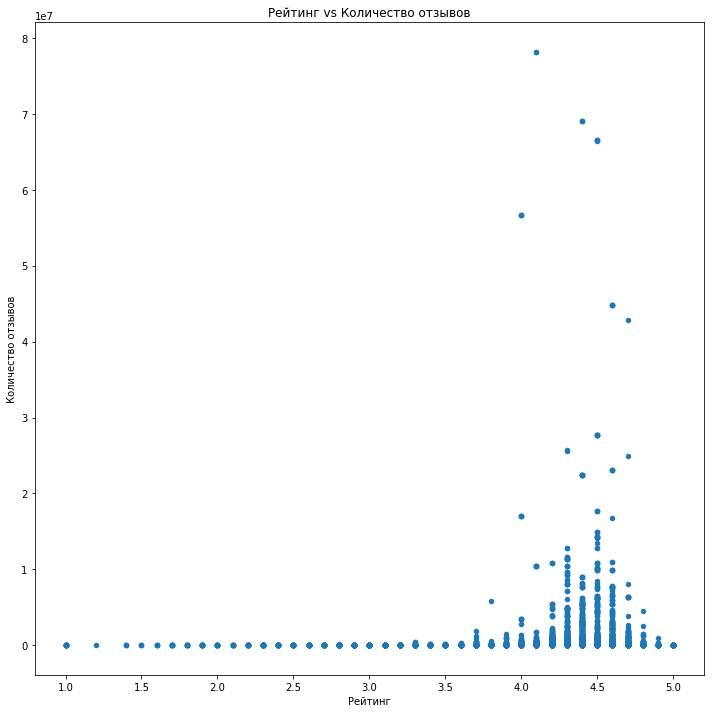

In [413]:
data.plot(x='Rating', y='Reviews', kind='scatter', figsize=(12, 12))
#plt.yscale('log')
#plt.xscale('log')
plt.title('Рейтинг vs Количество отзывов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество отзывов')
plt.show()

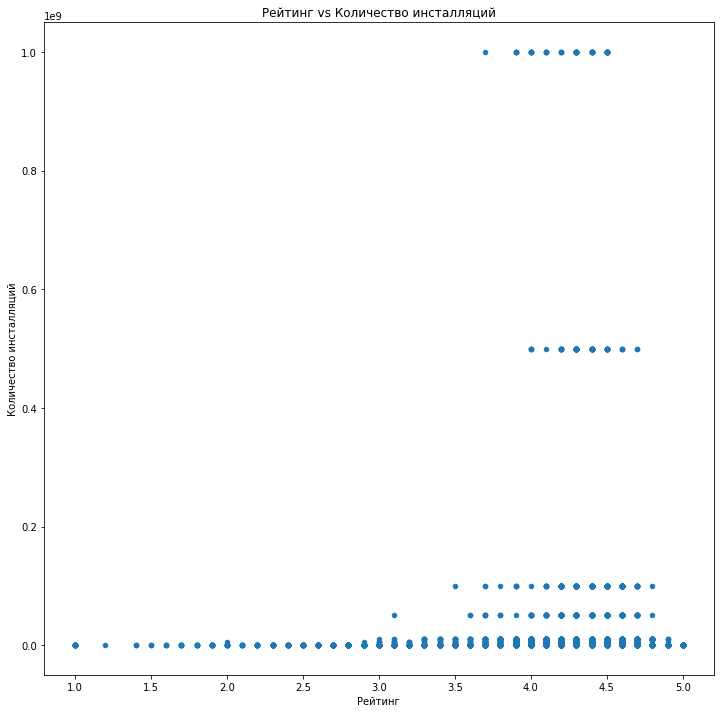

In [414]:
data.plot(x='Rating', y='Installs', kind='scatter', figsize=(12, 12))
#plt.yscale('log')
#plt.xscale('log')
plt.title('Рейтинг vs Количество инсталляций')
plt.xlabel('Рейтинг')
plt.ylabel('Количество инсталляций')
plt.show()

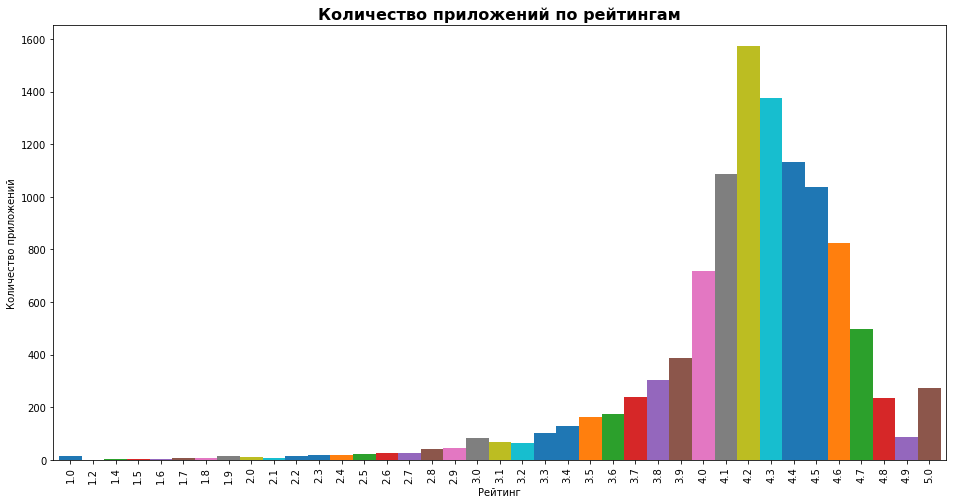

In [416]:
data['Rating'].value_counts().sort_index().plot(kind='bar', width=1, figsize=(16, 8))
plt.title('Количество приложений по рейтингам', fontsize = 16, fontweight='bold')
plt.xlabel('Рейтинг')
plt.ylabel('Количество приложений')
plt.show()

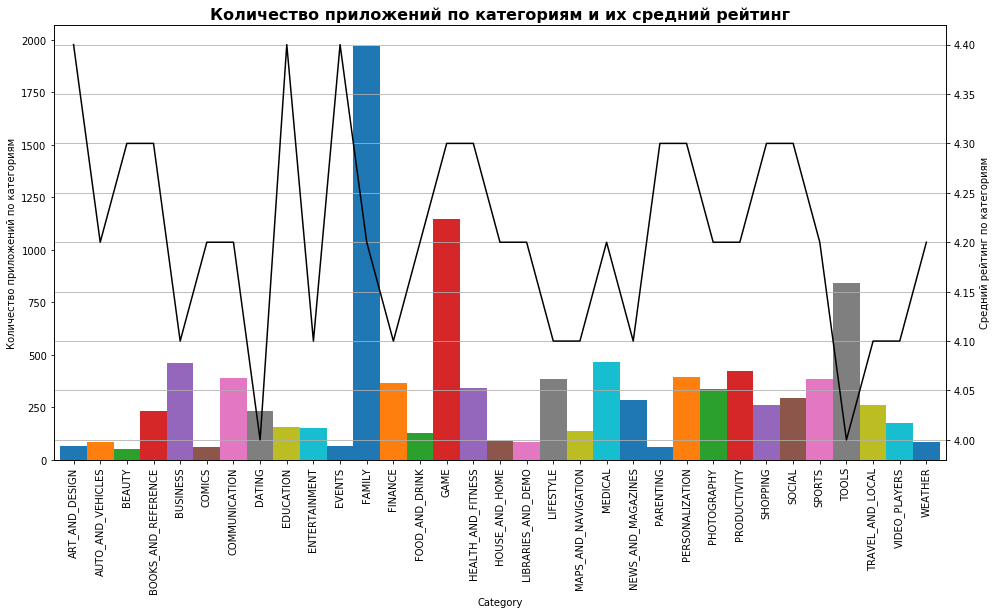

In [437]:
ax = data['Category'].value_counts().sort_index().plot(kind='bar', width=1, figsize=(16, 8))
plt.ylabel('Количество приложений по категориям')
data.groupby(['Category'])['Rating'].mean().round(1).plot(secondary_y=True, color='black', xlim=ax.get_xlim())
plt.ylabel('Средний рейтинг по категориям')
plt.title('Количество приложений по категориям и их средний рейтинг', fontsize = 16, fontweight='bold')
ax.set_xticklabels(sorted(data['Category'].unique()), rotation=90)
plt.grid()
plt.show()

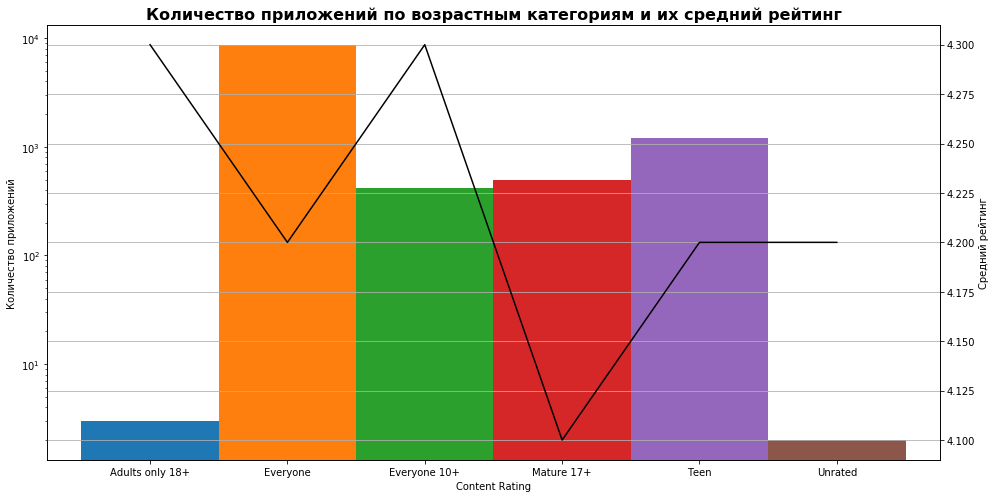

In [436]:
ax = data['Content Rating'].value_counts().sort_index().plot(kind='bar', width=1, figsize=(16, 8))
plt.ylabel('Количество приложений')
plt.yscale('log')
data.groupby(['Content Rating'])['Rating'].mean().round(1).plot(secondary_y=True, color='black', xlim=ax.get_xlim())
plt.ylabel('Средний рейтинг')
plt.title('Количество приложений по возрастным категориям и их средний рейтинг', fontsize = 16, fontweight='bold')
plt.grid()
plt.show()

In [438]:
#data['Rating'].value_counts().sort_values()
#data.groupby(['Content Rating'])['Rating'].mean().round(1)
data.groupby(['Category'])['Rating'].mean().round(1)

Category
ART_AND_DESIGN         4.4
AUTO_AND_VEHICLES      4.2
BEAUTY                 4.3
BOOKS_AND_REFERENCE    4.3
BUSINESS               4.1
COMICS                 4.2
COMMUNICATION          4.2
DATING                 4.0
EDUCATION              4.4
ENTERTAINMENT          4.1
EVENTS                 4.4
FAMILY                 4.2
FINANCE                4.1
FOOD_AND_DRINK         4.2
GAME                   4.3
HEALTH_AND_FITNESS     4.3
HOUSE_AND_HOME         4.2
LIBRARIES_AND_DEMO     4.2
LIFESTYLE              4.1
MAPS_AND_NAVIGATION    4.1
MEDICAL                4.2
NEWS_AND_MAGAZINES     4.1
PARENTING              4.3
PERSONALIZATION        4.3
PHOTOGRAPHY            4.2
PRODUCTIVITY           4.2
SHOPPING               4.3
SOCIAL                 4.3
SPORTS                 4.2
TOOLS                  4.0
TRAVEL_AND_LOCAL       4.1
VIDEO_PLAYERS          4.1
WEATHER                4.2
Name: Rating, dtype: float64

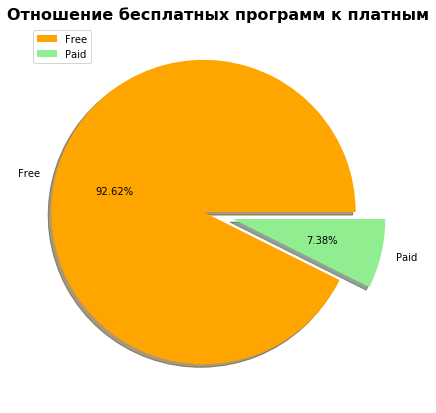

In [349]:
data['Type'].value_counts().sort_index().plot(kind='pie', colors=['orange', 'lightgreen'], explode = [0.1, 0.1], shadow = True, autopct = '%.2f%%', figsize=(7, 7))
plt.legend(loc='upper left')
plt.axis('off')
plt.title('Отношение бесплатных программ к платным', fontsize = 16, fontweight='bold')
plt.show()